In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [20]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [21]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_1/   data_Goose_all_2/     model/
data_Goose_1st_15s_2/  data_Goose_1st_5s_2/   data_Goose_all_5s_2/
data_Goose_1st_2/      data_Goose_all_15s_2/  figures/


In [22]:
len(train_loader), len(val_loader), len(test_loader)

(6, 4, 9)

In [23]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 15])
torch.Size([256, 1])
256
256
256


date:180325, rec:001, time:3239.0, label:0.0


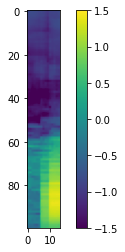

date:180325, rec:009, time:87.0, label:0.0


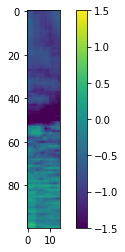

date:180325, rec:005, time:2783.0, label:1.0
date:180324, rec:009, time:1149.0, label:0.0


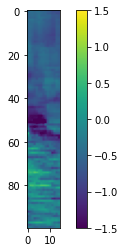

date:180322, rec:007, time:1439.0, label:0.0


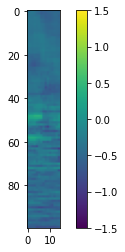

date:180325, rec:009, time:2442.0, label:0.0


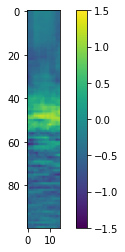

date:180325, rec:007, time:5030.0, label:0.0


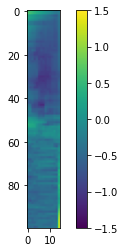

date:180325, rec:001, time:1707.0, label:0.0


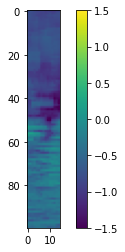

date:180324, rec:008, time:1138.0, label:0.0


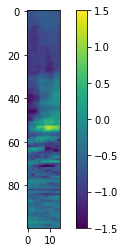

date:180324, rec:008, time:6931.0, label:0.0


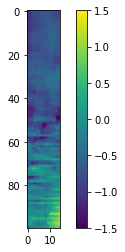

date:180324, rec:003, time:4919.0, label:1.0
date:180325, rec:001, time:1737.0, label:0.0


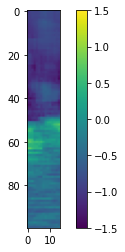

date:180325, rec:007, time:5855.0, label:0.0


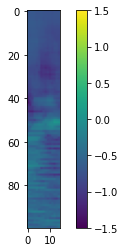

date:180323, rec:007, time:6428.0, label:0.0


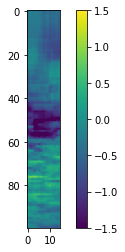

date:180324, rec:008, time:2635.0, label:0.0


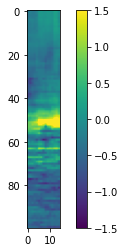

date:180324, rec:009, time:702.0, label:0.0


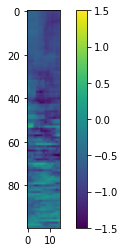

date:180324, rec:009, time:447.0, label:0.0


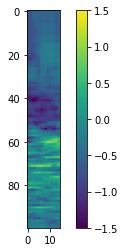

date:180325, rec:009, time:2037.0, label:0.0


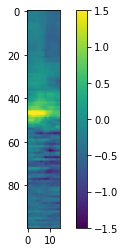

date:180324, rec:008, time:2485.0, label:0.0


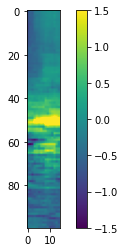

date:180325, rec:007, time:2788.0, label:0.0


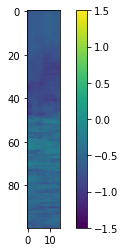

date:180323, rec:007, time:2246.0, label:0.0


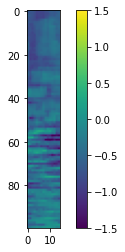

date:180324, rec:001, time:597.0, label:0.0


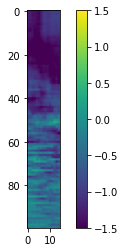

date:180325, rec:007, time:3555.0, label:1.0
date:180325, rec:001, time:6818.0, label:1.0
date:180325, rec:009, time:2502.0, label:0.0


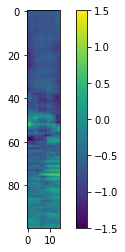

date:180324, rec:008, time:3430.0, label:0.0


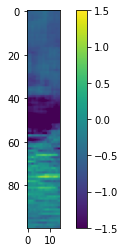

date:180322, rec:004, time:4626.0, label:1.0
date:180325, rec:001, time:897.0, label:0.0


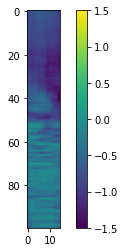

date:180325, rec:009, time:7170.0, label:0.0


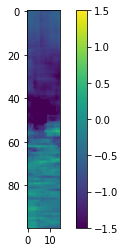

date:180323, rec:004, time:4456.0, label:1.0
date:180401, rec:001, time:1092.0, label:0.0


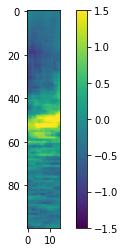

date:180325, rec:009, time:2322.0, label:0.0


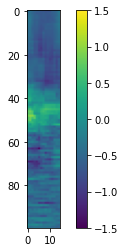

date:180323, rec:007, time:6788.0, label:0.0


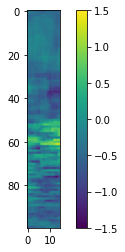

date:180323, rec:007, time:6563.0, label:0.0


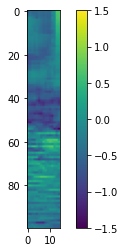

date:180325, rec:004, time:1635.0, label:1.0
date:180325, rec:005, time:210.0, label:0.0


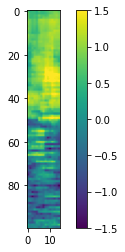

date:180323, rec:003, time:3433.0, label:1.0
date:180323, rec:007, time:2822.0, label:0.0


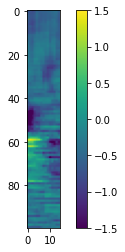

date:180323, rec:007, time:7088.0, label:0.0


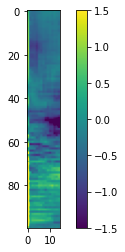

date:180325, rec:009, time:1602.0, label:0.0


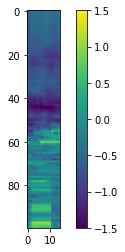

date:180324, rec:008, time:2710.0, label:0.0


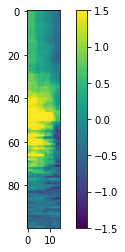

date:180324, rec:009, time:552.0, label:0.0


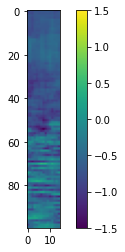

date:180401, rec:001, time:447.0, label:0.0


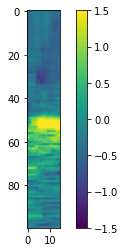

date:180324, rec:008, time:1573.0, label:0.0


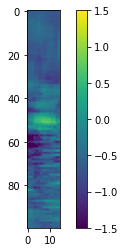

date:180401, rec:001, time:5344.0, label:0.0


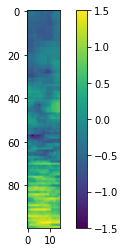

date:180322, rec:007, time:1709.0, label:0.0


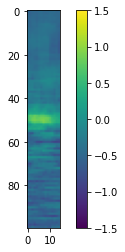

date:180325, rec:007, time:5765.0, label:0.0


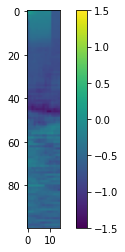

date:180401, rec:001, time:6500.0, label:1.0
date:180325, rec:004, time:1245.0, label:1.0
date:180324, rec:003, time:5054.0, label:1.0
date:180325, rec:005, time:4173.0, label:0.0


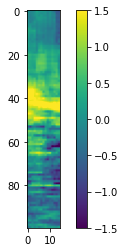

date:180325, rec:007, time:2623.0, label:0.0


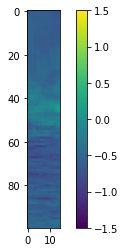

date:180322, rec:007, time:3461.0, label:0.0


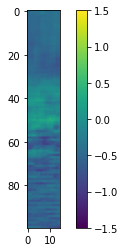

date:180325, rec:004, time:4646.0, label:1.0
date:180323, rec:007, time:5678.0, label:0.0


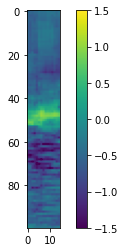

date:180325, rec:005, time:6545.0, label:1.0
date:180322, rec:007, time:3446.0, label:0.0


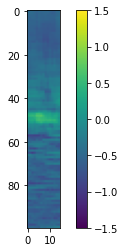

date:180324, rec:005, time:2657.0, label:1.0
date:180325, rec:005, time:27.0, label:0.0


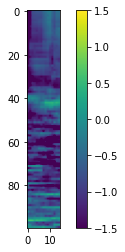

date:180324, rec:008, time:2815.0, label:0.0


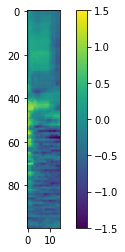

date:180401, rec:001, time:252.0, label:0.0


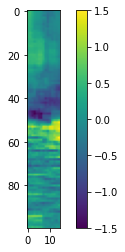

date:180323, rec:002, time:2138.0, label:1.0
date:180325, rec:007, time:4340.0, label:0.0


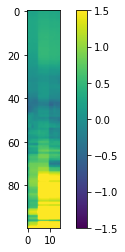

date:180323, rec:007, time:131.0, label:0.0


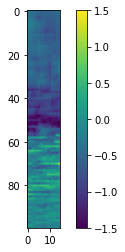

date:180324, rec:009, time:1225.0, label:0.0


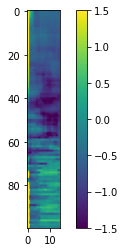

date:180324, rec:008, time:5236.0, label:0.0


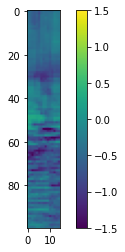

date:180325, rec:007, time:5810.0, label:0.0


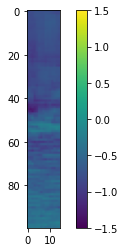

date:180325, rec:005, time:4188.0, label:0.0


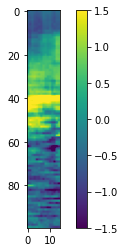

date:180322, rec:007, time:61.0, label:1.0
date:180324, rec:008, time:5911.0, label:0.0


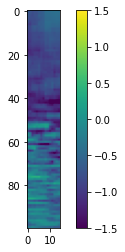

date:180325, rec:003, time:4625.0, label:0.0


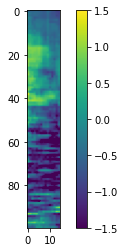

date:180401, rec:001, time:717.0, label:0.0


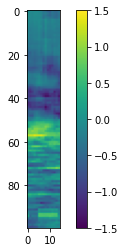

date:180324, rec:008, time:1468.0, label:0.0


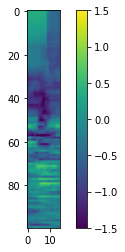

date:180322, rec:003, time:1415.0, label:1.0
date:180401, rec:001, time:582.0, label:0.0


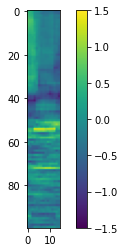

date:180324, rec:006, time:3371.0, label:1.0
date:180325, rec:007, time:5555.0, label:0.0


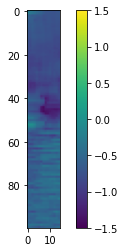

date:180324, rec:008, time:2605.0, label:0.0


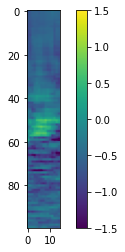

date:180325, rec:001, time:1677.0, label:0.0


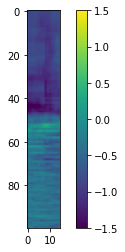

date:180322, rec:005, time:6066.0, label:1.0
date:180325, rec:007, time:4835.0, label:0.0


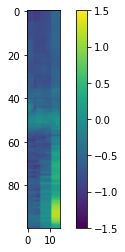

date:180323, rec:007, time:5558.0, label:0.0


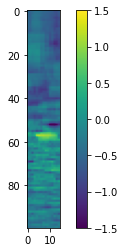

date:180325, rec:009, time:3663.0, label:1.0
date:180324, rec:008, time:5956.0, label:0.0


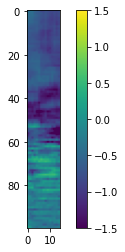

date:180324, rec:009, time:207.0, label:0.0


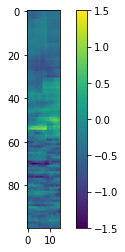

date:180325, rec:009, time:1257.0, label:0.0


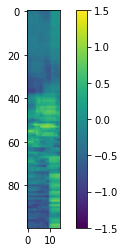

date:180401, rec:001, time:5419.0, label:0.0


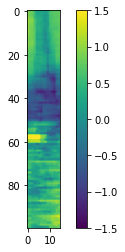

date:180324, rec:009, time:462.0, label:0.0


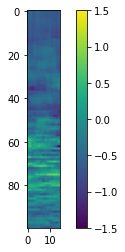

date:180401, rec:001, time:1377.0, label:0.0


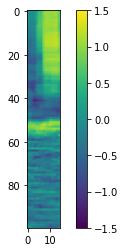

date:180401, rec:001, time:2196.0, label:1.0
date:180325, rec:002, time:3634.0, label:1.0
date:180322, rec:007, time:4577.0, label:0.0


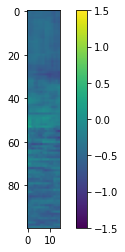

date:180325, rec:007, time:5945.0, label:0.0


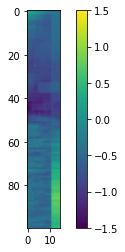

date:180401, rec:001, time:792.0, label:0.0


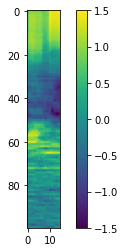

date:180325, rec:009, time:1722.0, label:0.0


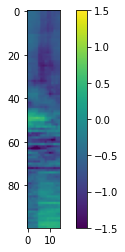

date:180324, rec:004, time:5331.0, label:1.0
date:180324, rec:008, time:5206.0, label:0.0


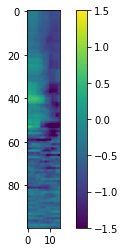

date:180325, rec:007, time:5615.0, label:0.0


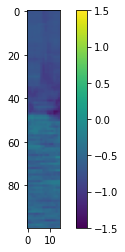

date:180325, rec:007, time:4655.0, label:0.0


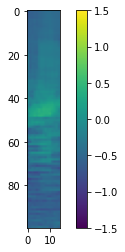

date:180325, rec:002, time:417.0, label:1.0
date:180323, rec:007, time:4799.0, label:0.0


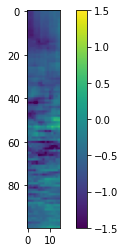

date:180325, rec:009, time:1032.0, label:0.0


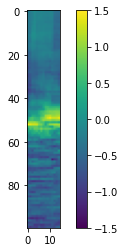

date:180322, rec:007, time:3566.0, label:0.0


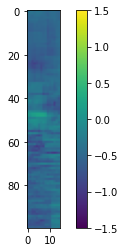

date:180401, rec:001, time:72.0, label:0.0


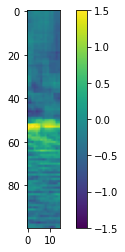

date:180324, rec:006, time:5623.0, label:1.0
date:180322, rec:007, time:4982.0, label:0.0


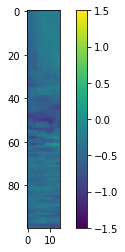

date:180325, rec:007, time:5570.0, label:0.0


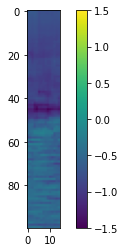

date:180325, rec:009, time:5096.0, label:0.0


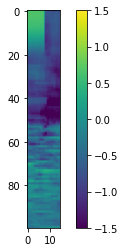

date:180322, rec:007, time:1814.0, label:0.0


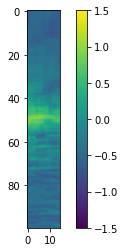

date:180401, rec:001, time:1602.0, label:0.0


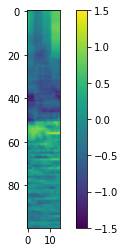

date:180323, rec:007, time:2867.0, label:0.0


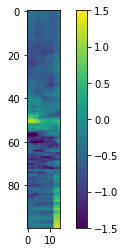

date:180325, rec:003, time:3700.0, label:1.0
date:180324, rec:001, time:910.0, label:0.0


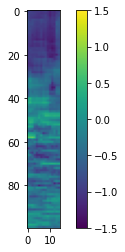

date:180323, rec:007, time:4634.0, label:0.0


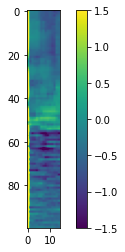

date:180401, rec:001, time:1752.0, label:0.0


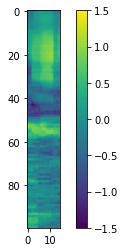

date:180323, rec:007, time:4649.0, label:0.0


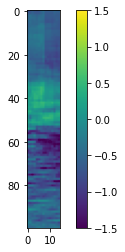

date:180325, rec:009, time:1812.0, label:0.0


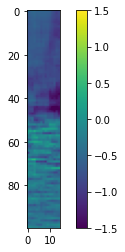

date:180322, rec:007, time:4622.0, label:0.0


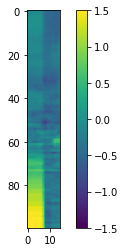

date:180324, rec:009, time:162.0, label:0.0


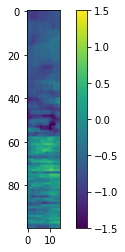

date:180325, rec:009, time:6261.0, label:1.0
date:180325, rec:004, time:5834.0, label:1.0
date:180325, rec:009, time:5081.0, label:0.0


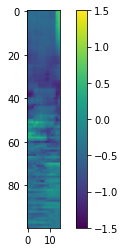

date:180325, rec:007, time:6395.0, label:0.0


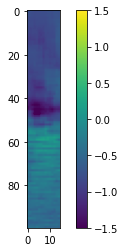

date:180325, rec:003, time:3654.0, label:1.0
date:180324, rec:009, time:297.0, label:0.0


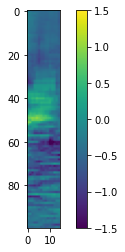

date:180401, rec:001, time:1272.0, label:0.0


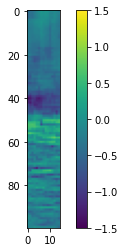

date:180323, rec:007, time:5483.0, label:0.0


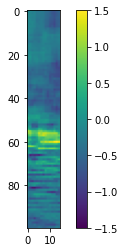

date:180322, rec:007, time:4007.0, label:0.0


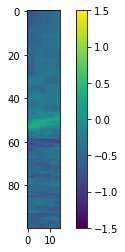

In [24]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [29]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 15

model = GLM(15*100).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [27]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.3891248404979706
Val loss for epoch 0: 0.3403598964214325
Train loss for epoch 1: 0.3860269784927368
Val loss for epoch 1: 0.34052416682243347
Train loss for epoch 2: 0.38333404064178467
Val loss for epoch 2: 0.34322476387023926
Train loss for epoch 3: 0.380350798368454
Val loss for epoch 3: 0.3499802052974701
Train loss for epoch 4: 0.3772600591182709
Val loss for epoch 4: 0.34427401423454285
Train loss for epoch 5: 0.3741209805011749
Val loss for epoch 5: 0.34212687611579895
Train loss for epoch 6: 0.3718421161174774
Val loss for epoch 6: 0.34766271710395813
Train loss for epoch 7: 0.3695209324359894
Val loss for epoch 7: 0.3554045557975769
Train loss for epoch 8: 0.3689460754394531
Val loss for epoch 8: 0.3473765254020691
Train loss for epoch 9: 0.36871859431266785
Val loss for epoch 9: 0.340756893157959
Train loss for epoch 10: 0.3642364740371704
Val loss for epoch 10: 0.3581242859363556
Train loss for epoch 11: 0.36208659410476685
Val loss for epoch 11: 0

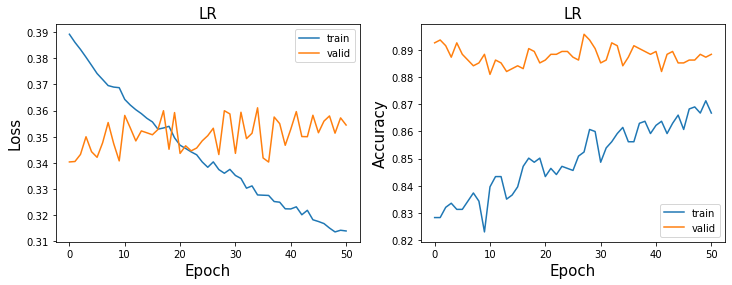

In [28]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

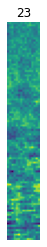

In [30]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [31]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6861317157745361 accuracy:0.6546068499758804


In [32]:
np.mean(np.concatenate(test_labels))

0.51037145

In [33]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

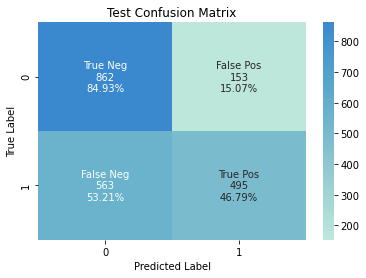

In [34]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:005, time:2714.0, label:1.0
Original data 62 CH


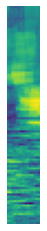

In [35]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [38]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23
timewindow = 15

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [39]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.48711705207824707
Val loss for epoch 0: 0.34495988488197327
Train loss for epoch 1: 0.4630202651023865
Val loss for epoch 1: 0.3490203022956848
Train loss for epoch 2: 0.4272015392780304
Val loss for epoch 2: 0.3758764863014221
Train loss for epoch 3: 0.4150623381137848
Val loss for epoch 3: 0.33758795261383057
3
Train loss for epoch 4: 0.4069553017616272
Val loss for epoch 4: 0.33786264061927795
Train loss for epoch 5: 0.40134304761886597
Val loss for epoch 5: 0.35522350668907166
Train loss for epoch 6: 0.3967821002006531
Val loss for epoch 6: 0.33424752950668335
6
Train loss for epoch 7: 0.39127928018569946
Val loss for epoch 7: 0.34401270747184753
Train loss for epoch 8: 0.3865736722946167
Val loss for epoch 8: 0.34096822142601013
Train loss for epoch 9: 0.3840228319168091
Val loss for epoch 9: 0.3446635901927948
Train loss for epoch 10: 0.38170018792152405
Val loss for epoch 10: 0.3357733488082886
Train loss for epoch 11: 0.3773043751716614
Val loss for ep

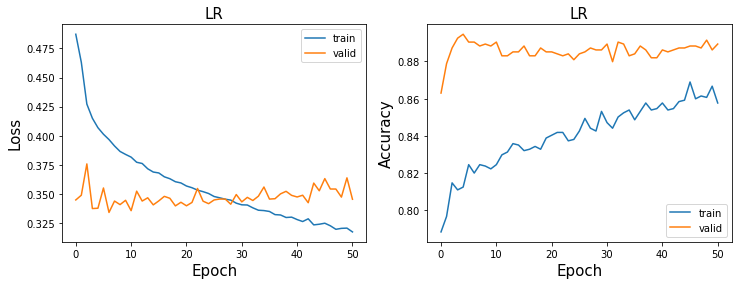

In [40]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

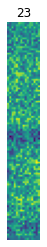

In [43]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [45]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6531864404678345 accuracy:0.6367583212735166


In [46]:
np.mean(np.concatenate(test_labels))

0.51037145

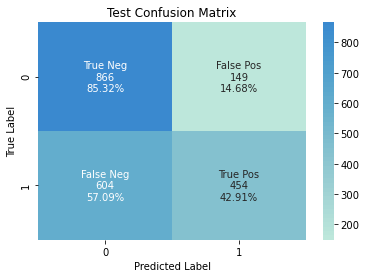

In [47]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:3311.0, label:1.0
Original data 62 CH


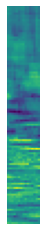

In [48]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic Regression with finite difference regularization

In [49]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [51]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, timewindow = timewindow)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5541371703147888
Val loss for epoch 0: 0.3761045038700104
Train loss for epoch 1: 0.4938451647758484
Val loss for epoch 1: 0.3453041911125183
1
Train loss for epoch 2: 0.44461461901664734
Val loss for epoch 2: 0.36028337478637695
Train loss for epoch 3: 0.4240717887878418
Val loss for epoch 3: 0.38776031136512756
Train loss for epoch 4: 0.41599464416503906
Val loss for epoch 4: 0.3419625163078308
4
Train loss for epoch 5: 0.409511923789978
Val loss for epoch 5: 0.32879260182380676
5
Train loss for epoch 6: 0.40128424763679504
Val loss for epoch 6: 0.3507608473300934
Train loss for epoch 7: 0.3965805172920227
Val loss for epoch 7: 0.3543841540813446
Train loss for epoch 8: 0.3922664225101471
Val loss for epoch 8: 0.34634706377983093
Train loss for epoch 9: 0.3884839713573456
Val loss for epoch 9: 0.3475983142852783
Train loss for epoch 10: 0.3856728672981262
Val loss for epoch 10: 0.3452860713005066
Train loss for epoch 11: 0.38420525193214417
Val loss for epoc

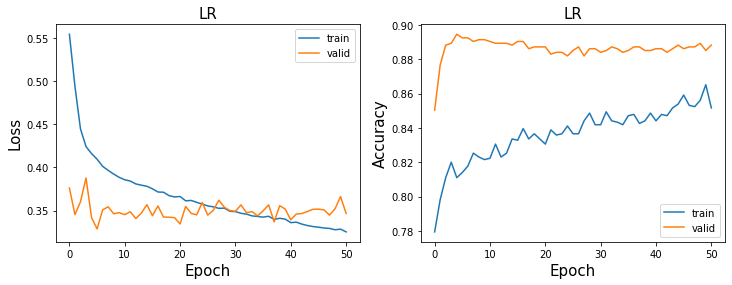

In [52]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

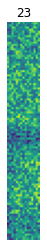

In [53]:
model = GLM(input_dim=100*timewindow).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, timewindow)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [54]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_0 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, timewindow = timewindow)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.6910907030105591 accuracy:0.6266280752532561


In [55]:
np.mean(np.concatenate(test_labels))

0.51037145

In [57]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_0, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

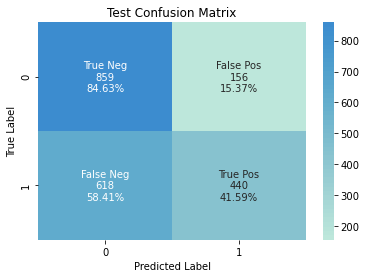

In [58]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:3311.0, label:1.0
Original data 62 CH


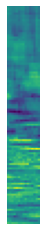

In [59]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][2], cases_wrong_0[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_0[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

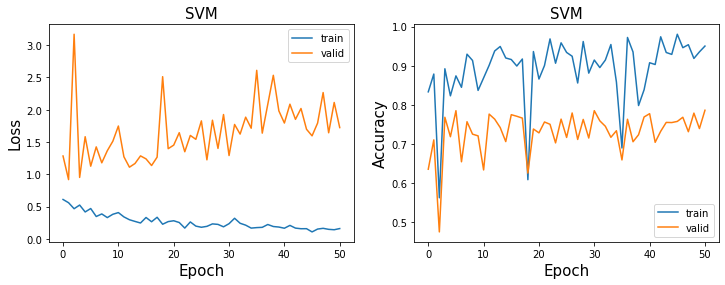

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

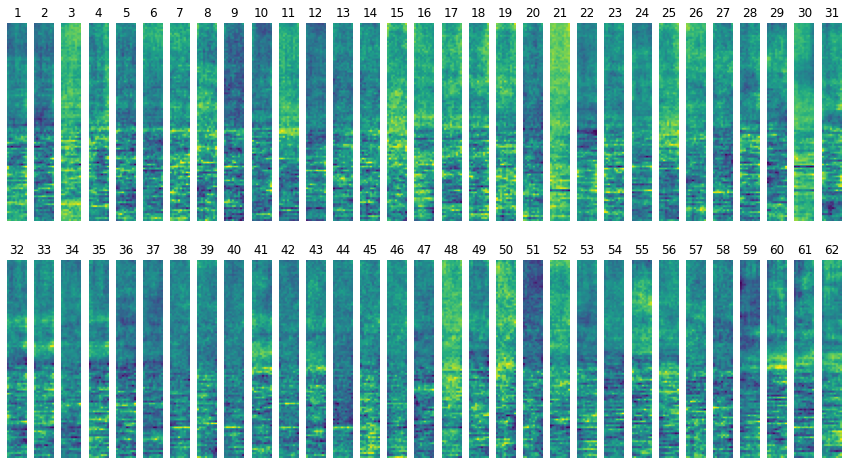

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


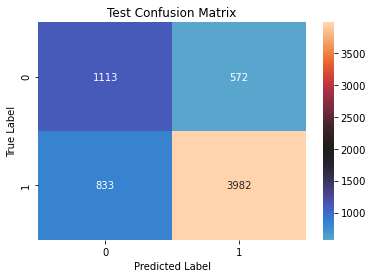

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


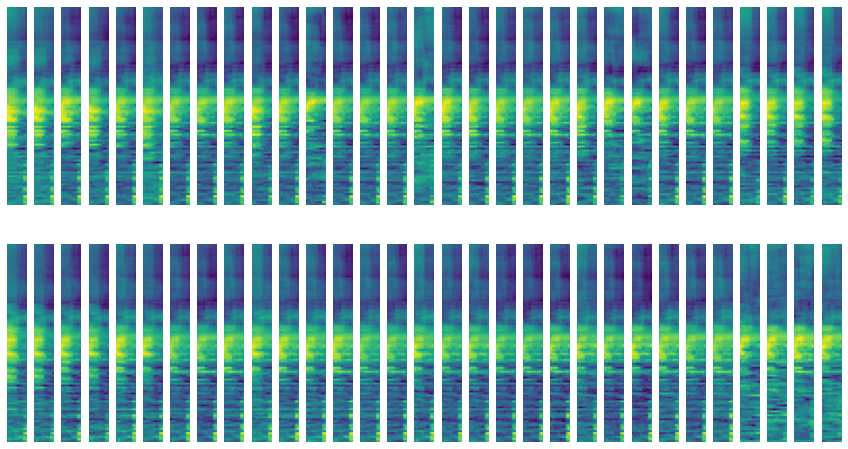

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

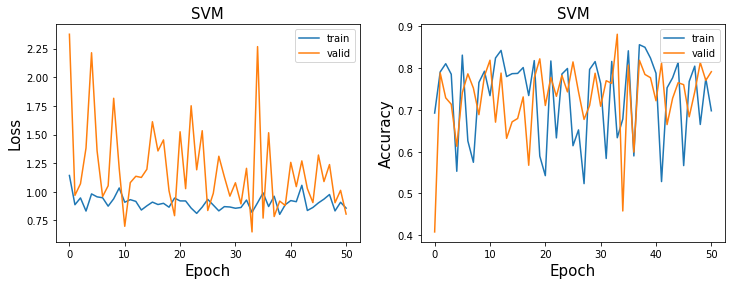

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

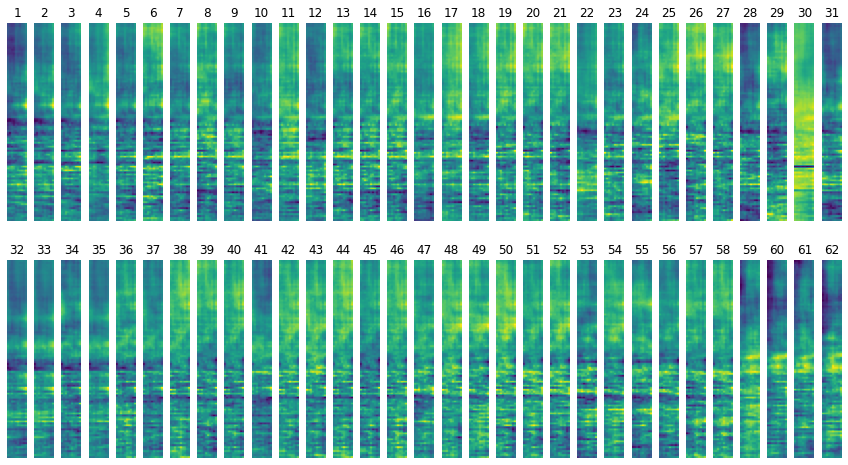

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


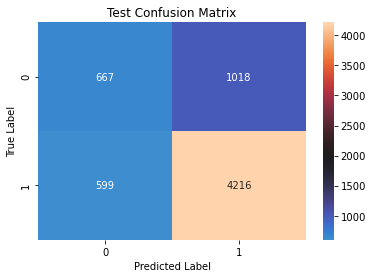

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


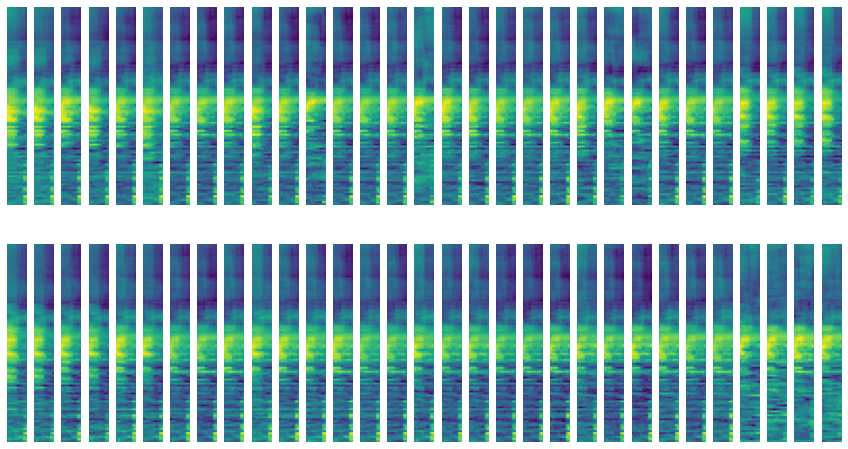

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

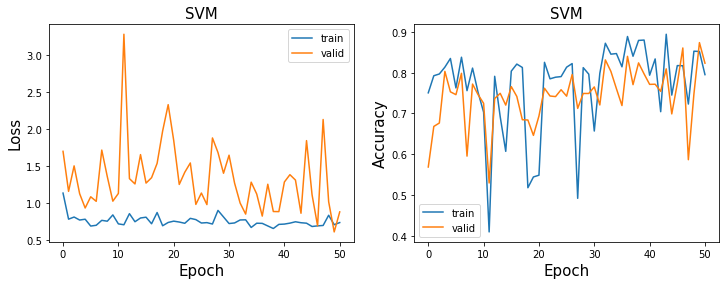

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

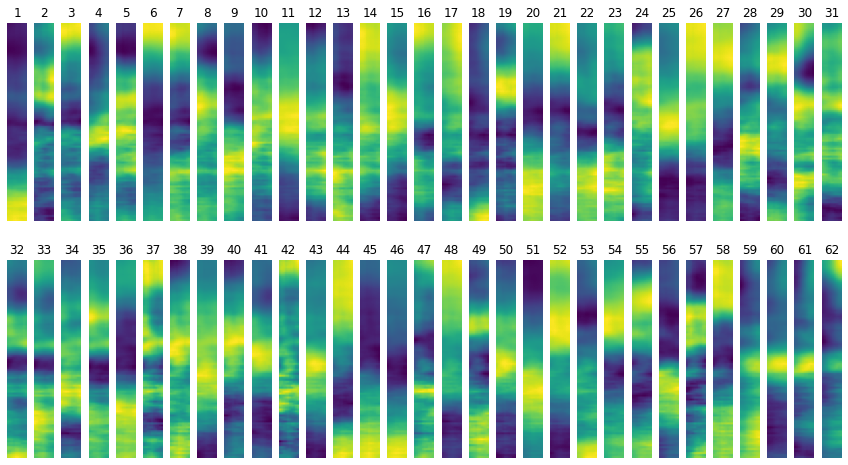

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


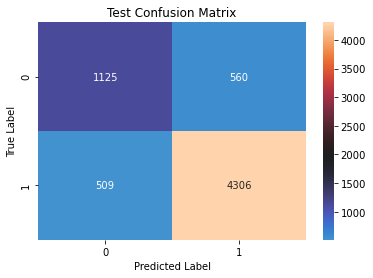

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


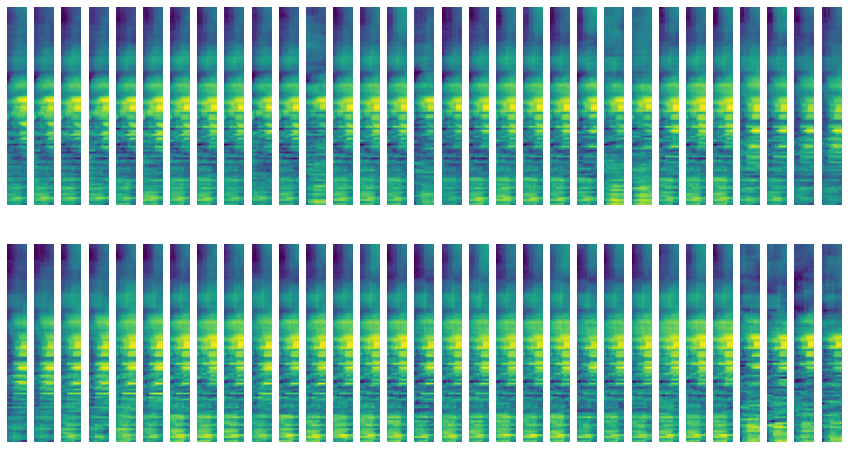

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()